In [1]:
#@title Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


In [2]:
#@title Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%pylab inline

#Importando bibliotecas necessárias

uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado'

data = pd.read_csv(uri)
# del data["Unnamed: 0"]
#Declarando caminho do conjunto de dados e instanciando um dataframe.

df = data[['follow_up_classified',
           'contraceptive_method___1',
           'family_cancer_id___6',
           'er_ihc',
           'pr_ihc',
           'tumor_subtype',
           'ultinfo',
           'reclocal',
           'recregio',
           'recdist',
           'basediag',
           'descmorfo',
           'tumor_stage',
           't',
           'm',
           'treatment_time',
           'her2_ihc',
           'recidive'
           ]]

array = df.values

data = data.drop(columns=['follow_up_days'])

data.head()

Populating the interactive namespace from numpy and matplotlib


,follow_up_classified,id,contraceptive_method___1,family_cancer_id___6,er_ihc,pr_ihc,tumor_subtype,ultinfo,reclocal,recregio,recdist,basediag,descmorfo,tumor_stage,t,m,treatment_time,her2_ihc,recidive
0,2,0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0,12,10.0,11.0,0.0,4382.9100,1.0,1.0
1,1,1,0.0,0.0,1.0,1.0,3.0,4.0,0.0,0.0,0.0,3.0,12,21.0,2.0,0.0,1826.2125,4.0,0.0
2,2,2,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,3.0,12,31.0,3.0,0.0,2921.9400,1.0,1.0
3,3,3,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,3.0,2,21.0,2.0,0.0,3287.1825,4.0,0.0
4,2,4,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,3.0,12,22.0,2.0,0.0,2921.9400,4.0,0.0


In [3]:
#@title Amostragem dos dados

# Divide as colunas em variaveis X e y
X = df.drop('follow_up_classified', axis=1).copy()
y = df[['follow_up_classified']].copy()

# Definindo o tamanho das amostras 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [4]:
#@title Criando máquina preditiva com logística

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_train, y_train)

y_predict = modelo.predict(X_test)

# Score do modelo nos dados de teste
result = modelo.score(X_test, y_test)
print("Acurácia nos dados de teste: %.3f%%" % (result * 100.0)) 

Acurácia nos dados de teste: 78.266%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [5]:
#@title Avaliando a máquina

print('Classification metrics: \n', classification_report(y_test, y_predict))

#Medindo a taxa de erro do modelo
mse = metrics.mean_squared_error(y_test, y_predict)
print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.82      0.55      0.66       193
           1       0.78      0.90      0.84       468
           2       0.75      0.75      0.75       126
           3       0.25      0.11      0.15         9

    accuracy                           0.78       796
   macro avg       0.65      0.58      0.60       796
weighted avg       0.78      0.78      0.77       796

MSE (Mean-Squared-Error): 0.23241206030150754


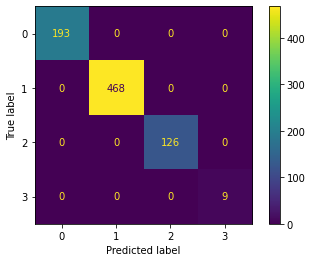

In [15]:
mse = metrics.mean_squared_error(y_test, y_test)
acu = metrics.accuracy_score(y_test, y_test) 

#print('MSE (Mean-Squared-Error): %s' %mse)
#print('Accuracy: %s' %acu)

#Medir a taxa de erro e a acurácia do modelo

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test)).plot()

In [7]:
from sklearn.model_selection import GridSearchCV

modelo = LogisticRegression()

# Cria o GridSearchCV

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

modelGS = GridSearchCV(modelo, parameters)

# Treina os modelos e guarda na variável modelGS o melhor modelo
modelGS.fit(X_train, y_train)
modelGS.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'penalty': 'l2', 'solver': 'newton-cg'}

In [8]:
print(modelGS.best_score_)
print(modelGS.best_params_)

0.8381016557566422
{'penalty': 'l2', 'solver': 'newton-cg'}


In [9]:
modelGS.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [10]:
reglog_best = modelGS.best_estimator_
reglog_best

LogisticRegression(solver='newton-cg')

In [11]:
# import métricas
from sklearn.metrics import recall_score, precision_score, f1_score

y_pred = reglog_best.predict(X_test)
print('Acc treino: ', reglog_best.score(X_train, y_train ))
print('Acc teste: ', reglog_best.score(X_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score(y_test, y_pred, average='micro'))
print( 'Precisão: ', precision_score( y_test, y_pred, average='micro' ))
print( 'F1_score: ', f1_score(y_test, y_pred, average='micro' ))

Acc treino:  0.844702923608928
Acc teste:  0.835427135678392
Revocação:  0.835427135678392
Precisão:  0.835427135678392
F1_score:  0.835427135678392


In [12]:
#@title Avaliando a máquina com hiperparâmetros

print('Classification metrics: \n', classification_report(y_test, y_pred))

#Medindo a taxa de erro do modelo
mse = metrics.mean_squared_error(y_test, y_predict)
print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.81      0.64      0.72       193
           1       0.84      0.92      0.87       468
           2       0.89      0.87      0.88       126
           3       0.38      0.33      0.35         9

    accuracy                           0.84       796
   macro avg       0.73      0.69      0.71       796
weighted avg       0.83      0.84      0.83       796

MSE (Mean-Squared-Error): 0.23241206030150754
